# Analysis of Biomechanical Features of Orthopedic Patients

#### Author: Golpira Elmi Assadzadeh

## Introduction

Biomechanics is the science focusing on the mechanics of body movement. The orthopedic health condition of a person can be detected from his/her biomechanical features. The dataset provided in this project contains six biomechanical features (namely, pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope, pelvic radius, grade of spondylolisthesis) and diagnosis for 310 patients. The biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine. The patient diagnosis falls into three different categories:

A) Hernia is when there is an injury to the cushioning and connective tissue between vertebrae  

B) Spondylolisthesis is a medical condition in which one of the vertebrae slips out of place onto the bone below

C) Normal: No injury

The goal of this project is to predict patient diagnosis based on biomechanical features. Machine learning algorithms in medical fields have widely been used in disease prediction as such approaches may be considered of great assistance in the decision making process of medical practitioners.

## Data Source

The dataset provided here is from UCI Machine Learning Repository and is available for download at https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients. 


## Exploratory Data Analysis
### Loading required libraries

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#### Downloading data and checking first few rows:

In [532]:
url = 'https://github.com/golpiraelmi/Biomechanical-features-of-orthopedic-patients/raw/master/column_3C_weka.csv'
df = pd.read_csv(url)
df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


#### Descriptive analysis of features:

In [533]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### General information about dataset:

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


#### Name of columns in dataset:

In [593]:
df.shape

(310, 7)

In [534]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

#### Check to see if there is any missing values:

In [536]:
print (df.isnull().values.any())

False


The dataset had no missing values.

#### Plot showing the number of patients in each category:

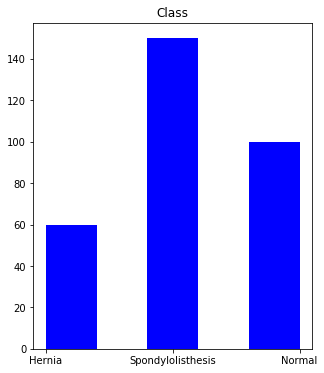

In [481]:
plt.figure(figsize=(5,6))
plt.hist(df['class'], bins=5, color='b')
plt.title('Class')
plt.show()

#### Scatterplot showing correlation between different features: 

Orange dots are normal class and blue dots are injured patients. The distribution of each feature is also plotted.

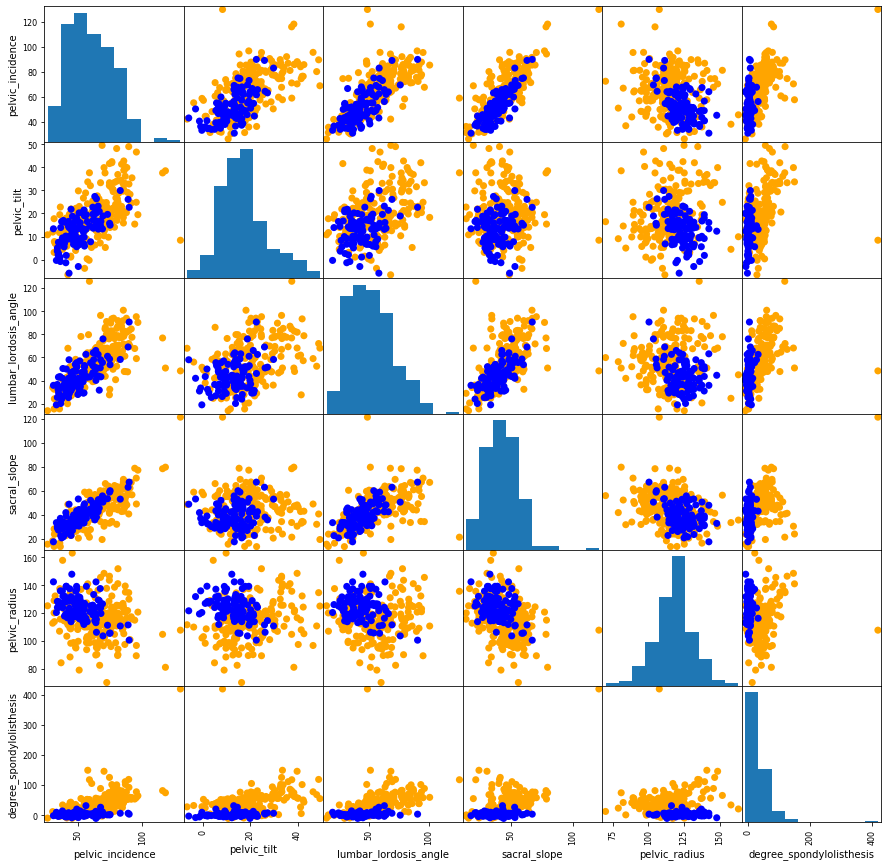

In [483]:
color_list = ['blue' if i=='Normal' else 'orange' for i in df.loc[:,'class']]

pd.plotting.scatter_matrix(df.loc[:, df.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 50,
                                       marker = 'o')

plt.show()

#### Boxplot showing different feature values for each diagnosis class:

In [485]:
# melt function works like gather in R.
df_n = pd.melt(df, id_vars=['class'], value_vars=['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 
                               'pelvic_radius', 'degree_spondylolisthesis'], var_name='feature', value_name='value')

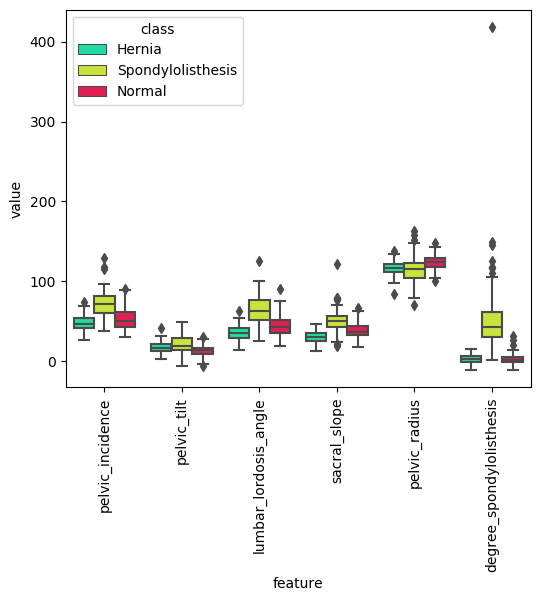

In [487]:
plt.figure(figsize=(6,5), dpi=100)
sns.boxplot(y='value', x='feature', data=df_n, palette="gist_ncar", hue='class')
plt.xticks(rotation=90)
plt.show()

#### Table and plot of correlation matrix for various features:

In [538]:
df.corr()  #correlation matrix

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


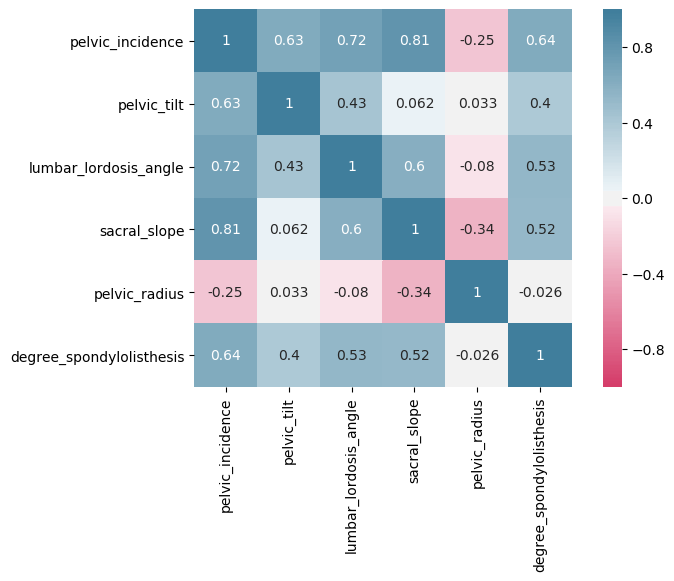

In [539]:
plt.figure(figsize=(8,5), dpi=100)

ax= sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 950, n=200),
    square=True, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Machine Learning 

#### Creating arrays from dataframe to be used with sklearn:

In [560]:
X = df[['pelvic_incidence', 'pelvic_tilt','lumbar_lordosis_angle','sacral_slope', 
        'pelvic_radius', 'degree_spondylolisthesis']].values

y = df['class']

### Normalizing Data

In [595]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       [ 0.51138997,  0.71156241, -0.41133905,  0.12612823, -1.2073033 ,
        -0.40228841],
       [-0.62664788, -0.78969266, -1.27474511, -0.21587588, -0.73345503,
        -0.4901061 ]])

#### Splitting data into training and testing sets

In [563]:
from sklearn.model_selection import train_test_split

In [564]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [565]:
X_trainset.shape

(217, 6)

In [566]:
y_trainset.shape

(217,)

In [567]:
X_testset.shape

(93, 6)

In [568]:
y_testset.shape

(93,)

## Decision Tree Classifier

#### Defining the tree:

In [569]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="gini", max_depth = 3)
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Fitting the training data:

In [570]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Predicting classes with decision tree algorithm:

In [571]:
predictions_tree = Tree.predict(X_testset)

#### Evaluating the model:

In [572]:
from sklearn import metrics
print("DecisionTrees's Accuracy : ", metrics.accuracy_score(y_testset, predictions_tree))

DecisionTrees's Accuracy :  0.8494623655913979


#### Plotting the decision tree:

In [573]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

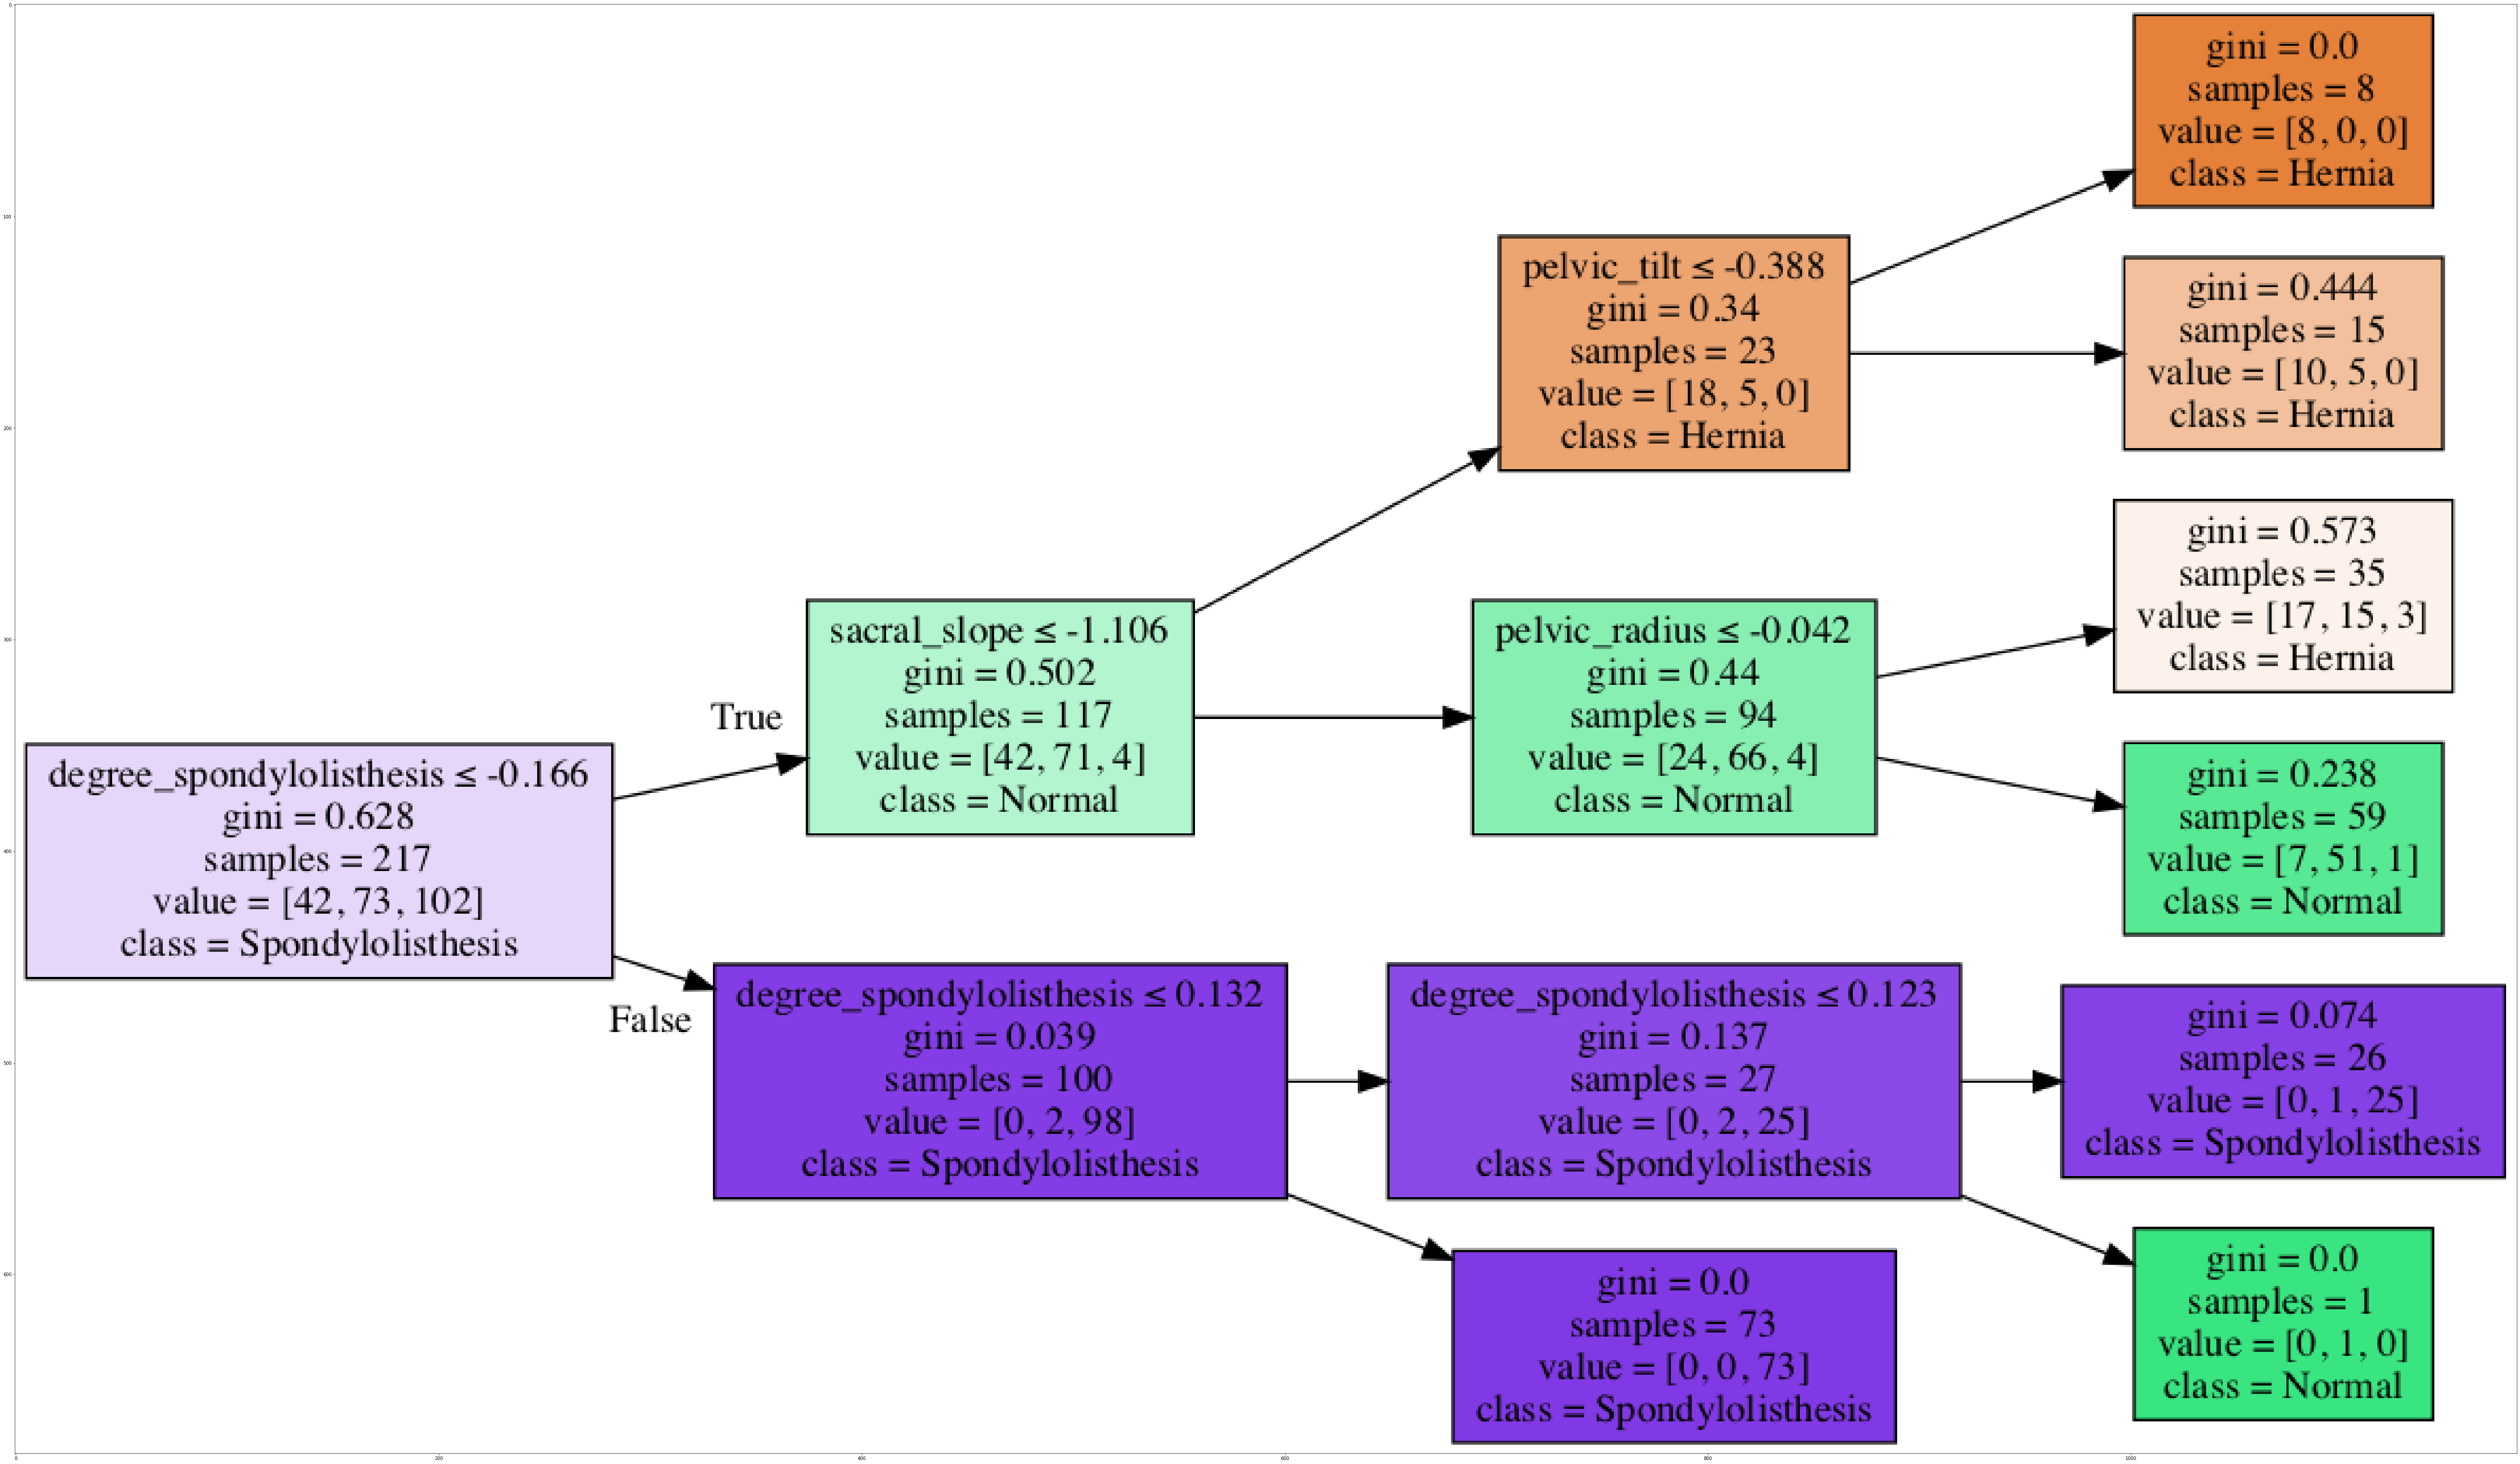

In [574]:
dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:6]
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, 
                         class_names= np.unique(y_trainset), filled=True,  
                         special_characters=True,rotate=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

## K-Nearest Neighbor Classifier

## Tuning Parameter (K)

#### Finding the best K:

K in KNN, is the number of nearest neighbors to examine. How can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of predictions using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model. Accuracy of KNN for different Ks is calculated.

In [586]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.79569892, 0.76344086, 0.78494624, 0.82795699, 0.78494624,
       0.80645161, 0.77419355, 0.8172043 , 0.79569892, 0.82795699,
       0.82795699, 0.80645161, 0.82795699, 0.8172043 , 0.80645161,
       0.8172043 , 0.83870968, 0.80645161, 0.8172043 , 0.8172043 ,
       0.79569892, 0.80645161, 0.78494624, 0.79569892, 0.77419355,
       0.79569892, 0.78494624, 0.78494624, 0.78494624, 0.77419355,
       0.79569892, 0.80645161, 0.79569892, 0.79569892, 0.76344086,
       0.79569892, 0.78494624, 0.78494624, 0.79569892, 0.78494624,
       0.77419355, 0.77419355, 0.78494624, 0.79569892, 0.79569892,
       0.80645161, 0.78494624, 0.80645161, 0.80645161, 0.8172043 ,
       0.78494624, 0.79569892, 0.77419355, 0.79569892, 0.75268817,
       0.75268817, 0.75268817, 0.74193548, 0.75268817, 0.75268817,
       0.76344086, 0.76344086, 0.76344086, 0.75268817, 0.74193548,
       0.75268817, 0.75268817, 0.75268817, 0.74193548, 0.75268817,
       0.7311828 , 0.74193548, 0.7311828 , 0.7311828 , 0.74193

#### Plot model accuracy for different Ks:

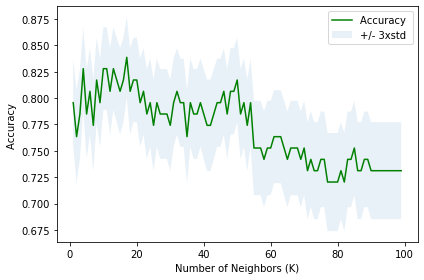

In [587]:

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [588]:
print( "The best accuracy is", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy is 0.8387096774193549 with k= 17


## Predicting with the tuned K:

In [589]:
k =  mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
yhat = neigh.predict(X_testset)
print("Train set Accuracy: ", metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print("Test set Accuracy: ", metrics.accuracy_score(y_testset, yhat))

Train set Accuracy:  0.7880184331797235
Test set Accuracy:  0.8387096774193549


## Conclusion

The decision tree provides us a slightly better accuracy of 85% while KNN will result in 84%.